## STOCK TREND PREDICTION 

##### Importing the libraries 

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as data
import yfinance as yf
from datetime import date

##### Yahoo!, Y!Finance, and Yahoo! finance are registered trademarks of Yahoo, Inc.
###### yfinance is not affiliated, endorsed, or vetted by Yahoo, Inc. It's an open-source tool that uses Yahoo's publicly available APIs, and is intended for research and educational purposes.

###### Here we will work only on AAPL stock.

In [56]:
start = '2010-01-01'
end = date.today()

df = yf.download('AAPL', start, end)
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.260345,55962800
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.532745,45326900
2023-05-10,173.020004,174.029999,171.899994,173.559998,173.320267,53724500
2023-05-11,173.850006,174.589996,172.169998,173.750000,173.510010,49514700
2023-05-12,173.619995,174.059998,171.000000,172.570007,172.570007,45497800


In [57]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496296,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392175,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434674,447610800


In [58]:
df = df.drop(["Adj Close"], axis = 1)
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800


##### Plotting a graph describling the closing price of AAPL stock from 2010 to 2023
###### Closing Price v/s Time

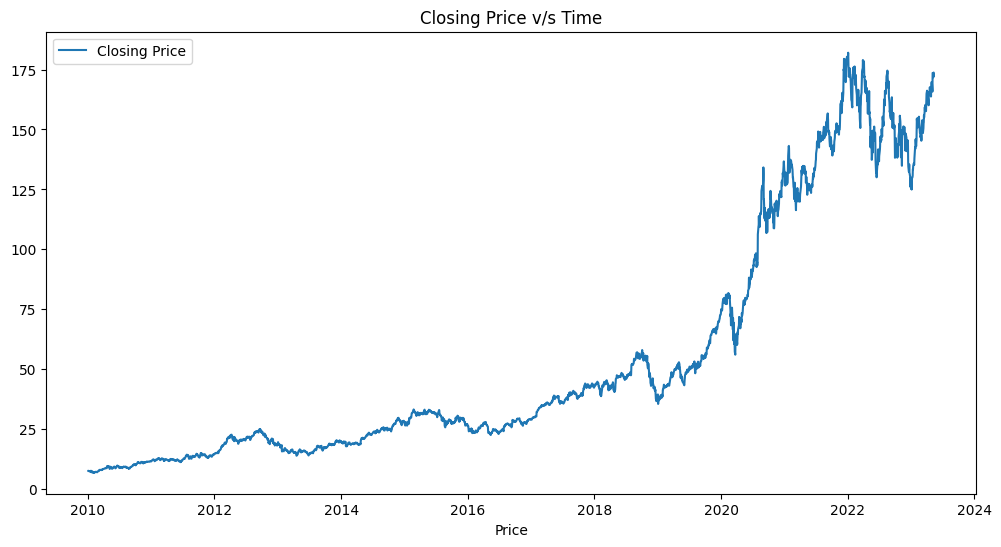

In [132]:
plt.figure(figsize=(12,6))
plt.plot(df.Date,df.Close, label="Closing Price")
plt.title("Closing Price v/s Time")
plt.xlabel("Time")
plt.xlabel("Price")
plt.legend()

In [60]:
df

,Date,Open,High,Low,Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...,...
3358,2023-05-08,172.479996,173.850006,172.110001,173.500000,55962800
3359,2023-05-09,173.050003,173.539993,171.600006,171.770004,45326900
3360,2023-05-10,173.020004,174.029999,171.899994,173.559998,53724500
3361,2023-05-11,173.850006,174.589996,172.169998,173.750000,49514700


##### Now we will plot a graph of Closing Price v/s Time with Moving Averages

### What Is a Moving Average (MA)?

###### In finance, a moving average (MA) is a stock indicator commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price.
###### By calculating the moving average, the impacts of random, short-term fluctuations on the price of a stock over a specified time frame are mitigated. Simple moving averages (SMAs) use a simple arithmetic average of prices over some timespan, while exponential moving averages (EMAs) place greater weight on more recent prices than older ones over the time period.
###### Moving averages are calculated to identify the trend direction of a stock or to determine its support and resistance levels. It is a trend-following or lagging, indicator because it is based on past prices.



#### In this we are going to implement the Simple Moving Average (SMA)

##### Simple Moving Average
###### A simple moving average (SMA), is calculated by taking the arithmetic mean of a given set of values over a specified period. A set of numbers, or prices of stocks, are added together and then divided by the number of prices in the set. The formula for calculating the simple moving average of a security is as follows:

###### SMA = (A1+A2+A3+....+An)/n
###### where:
###### A=Average in period n
###### n=Number of time periods

In [61]:
# TAking a 100 day moving average.
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3358    150.419900
3359    150.682900
3360    150.986399
3361    151.358899
3362    151.739500
Name: Close, Length: 3363, dtype: float64

##### Plotting a graph of Closing Price v/s Time with 100 Days Moving Averages

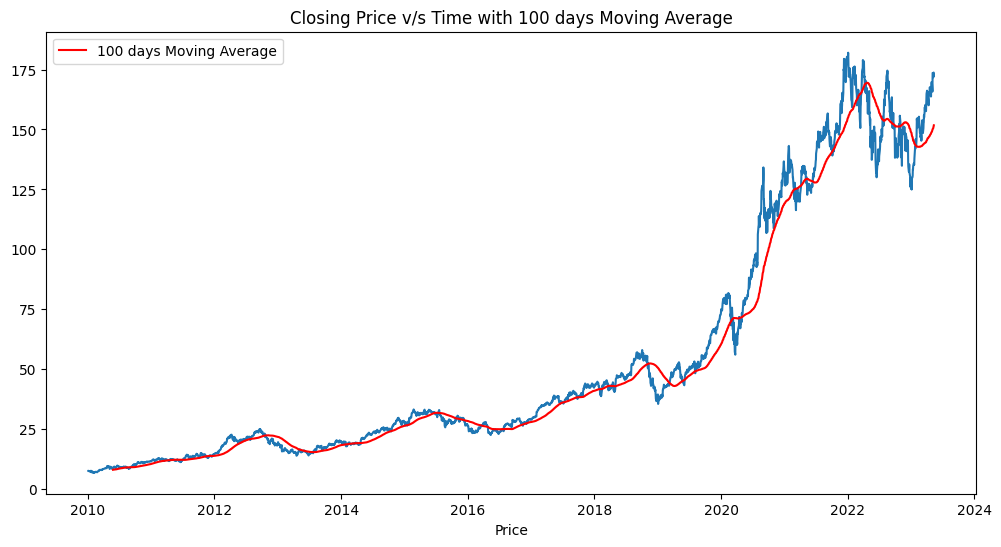

In [133]:
plt.figure(figsize = (12,6))
plt.plot(df.Date,df.Close)
plt.plot(df.Date,ma100, color="r", label="100 days Moving Average")
plt.title("Closing Price v/s Time with 100 days Moving Average")
plt.xlabel("Time")
plt.xlabel("Price")
plt.legend()

##### Plotting a graph of Closing Price v/s Time with 200 Days Moving Averages

In [63]:
#Taking a 200 days moving Average
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3358    151.462949
3359    151.551350
3360    151.654400
3361    151.765149
3362    151.844050
Name: Close, Length: 3363, dtype: float64

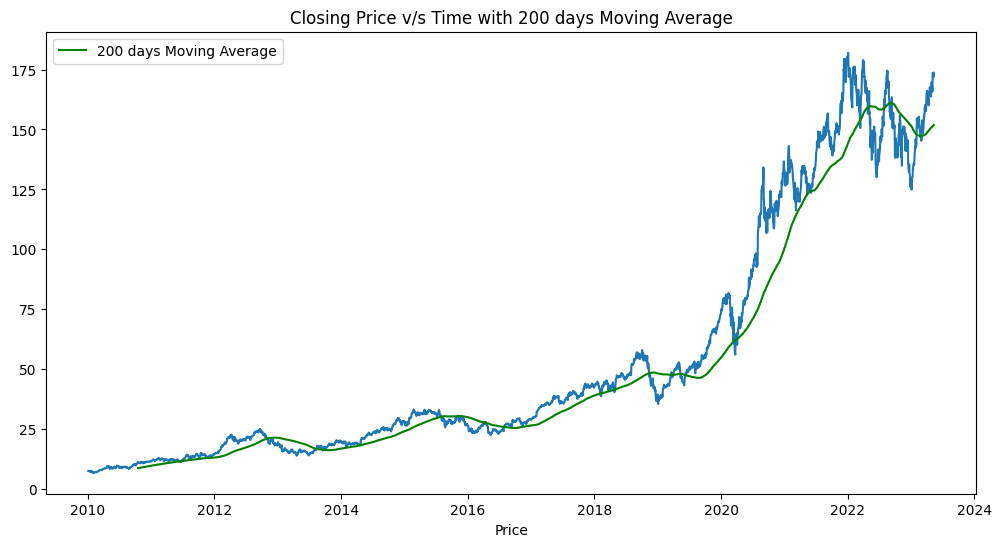

In [134]:
plt.figure(figsize = (12,6))
plt.plot(df.Date,df.Close)
plt.plot(df.Date,ma200, color="g", label="200 days Moving Average")
plt.title("Closing Price v/s Time with 200 days Moving Average")
plt.xlabel("Time")
plt.xlabel("Price")
plt.legend()

##### Plotting and Analysing graph of Closing Price v/s Time with 100 Days and 200 Days Moving Averages

##### When the 100day SMA (red line) is above the 200days SMA(green line) then a up-trend can be seen and if the reverse occurs then a down-trend occurs
###### Many experts also use Exponential moving average for the analysis of the trend of Stocks.

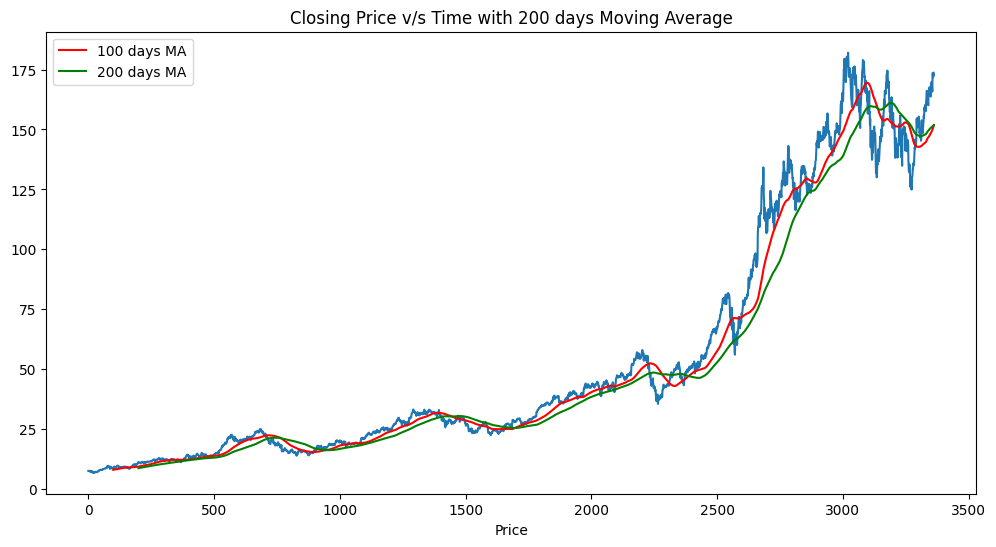

In [138]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, color="r", label="100 days MA")
plt.plot(ma200, color="g", label="200 days MA")

plt.title("Closing Price v/s Time with 200 days Moving Average")
plt.xlabel("Time")
plt.xlabel("Price")
plt.legend()

#### Splitting data into training and testing

In [66]:
#splitting data into training and testing

data_training = pd.DataFrame(df["Close"][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df["Close"][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2354, 1)
(1009, 1)


In [67]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [68]:
data_testing.head()

,Close
2354,46.430000
2355,47.165001
2356,47.730000
2357,47.520000
2358,47.250000


In [69]:
#Scalling the data between 0 and 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [70]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.85745296],
       [0.84679984],
       [0.82950064]])

#### Traing Data

In [71]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0]) 
    
x_train, y_train =np.array(x_train), np.array(y_train)

In [72]:
x_train

array([[[0.01533047],
        [0.01558878],
        [0.01320823],
        ...,
        [0.03819355],
        [0.03711847],
        [0.03634356]],

       [[0.01558878],
        [0.01320823],
        [0.01293595],
        ...,
        [0.03711847],
        [0.03634356],
        [0.04279409]],

       [[0.01320823],
        [0.01293595],
        [0.01391331],
        ...,
        [0.03634356],
        [0.04279409],
        [0.04525843]],

       ...,

       [[0.69228031],
        [0.70132078],
        [0.67459016],
        ...,
        [0.90070087],
        [0.88472112],
        [0.85725752]],

       [[0.70132078],
        [0.67459016],
        [0.66706457],
        ...,
        [0.88472112],
        [0.85725752],
        [0.85745296]],

       [[0.67459016],
        [0.66706457],
        [0.67747341],
        ...,
        [0.85725752],
        [0.85745296],
        [0.84679984]]])

In [73]:
y_train

array([0.04279409, 0.04525843, 0.04801596, ..., 0.85745296, 0.84679984,
       0.82950064])

In [74]:
x_train.shape

(2254, 100, 1)

In [75]:
y_train.shape

(2254,)

##### Making the ML Model with Sequential and LSTM from tensorflow.keras

In [76]:
# ML Model

from tensorflow.keras import Sequential
from keras.layers import Dense, Dropout, LSTM

In [77]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences=True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))



model.add(LSTM(units=80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))



model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

##### Training the model with our train data that we have fetched from yfinance. We will use 'adam' Optimizer and 'mean_squared_error' or MSE for determining loss factor of the model. Taking Epochs = 50

In [79]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
71/71 [==============================] - 42s 525ms/step - loss: 0.0335
Epoch 2/50
71/71 [==============================] - 21s 293ms/step - loss: 0.0071
Epoch 3/50
71/71 [==============================] - 16s 231ms/step - loss: 0.0061
Epoch 4/50
71/71 [==============================] - 16s 220ms/step - loss: 0.0057
Epoch 5/50
71/71 [==============================] - 15s 213ms/step - loss: 0.0058
Epoch 6/50
71/71 [==============================] - 16s 228ms/step - loss: 0.0052
Epoch 7/50
71/71 [==============================] - 16s 222ms/step - loss: 0.0050
Epoch 8/50
71/71 [==============================] - 16s 230ms/step - loss: 0.0047
Epoch 9/50
71/71 [==============================] - 16s 225ms/step - loss: 0.0044
Epoch 10/50
71/71 [==============================] - 16s 228ms/step - loss: 0.0043
Epoch 11/50
71/71 [==============================] - 17s 237ms/step - loss: 0.0047
Epoch 12/50
71/71 [==============================] - 16s 228ms/step - loss: 0.0038
Epoch 13/50
7

###### Saving the model

In [97]:
model.save("stock_trend_prediction_model_main")

INFO:tensorflow:Assets written to: stock_trend_prediction_model_main\assets


INFO:tensorflow:Assets written to: stock_trend_prediction_model_main\assets


##### Testing the ML Model

In [81]:
#testing the ML Model

data_testing.head()

,Close
2354,46.430000
2355,47.165001
2356,47.730000
2357,47.520000
2358,47.250000


In [82]:
past_100_days = data_training.tail(100)
past_100_days

,Close
2254,40.985001
2255,41.517502
2256,40.222500
2257,39.207500
2258,37.682499
...,...
2349,52.119999
2350,50.715000
2351,50.724998
2352,50.180000


In [83]:
final_df = past_100_days.append(data_testing, ignore_index= True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6108\3501726630.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index= True)


In [84]:
final_df

,Close
0,40.985001
1,41.517502
2,40.222500
3,39.207500
4,37.682499
...,...
1104,173.500000
1105,171.770004
1106,173.559998
1107,173.750000


In [85]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.03712555],
       [0.0407613 ],
       [0.03191943],
       ...,
       [0.94230607],
       [0.94360335],
       [0.93554673]])

In [86]:
input_data

array([[0.03712555],
       [0.0407613 ],
       [0.03191943],
       ...,
       [0.94230607],
       [0.94360335],
       [0.93554673]])

In [87]:
input_data.shape

(1109, 1)

In [88]:
x_test = []
y_test = []

for i in range (100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [89]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1009, 100, 1)
(1009,)


##### Our ML MOdel Making Predictions

In [90]:
#Making Predictions

y_predicted = model.predict(x_test)

32/32 [==============================] - 3s 69ms/step


In [91]:
y_predicted.shape

(1009, 1)

In [92]:
y_test

array([0.0743023 , 0.07932065, 0.08317828, ..., 0.94230607, 0.94360335,
       0.93554673])

In [93]:
y_predicted

array([[0.1508985 ],
       [0.15124471],
       [0.15137888],
       ...,
       [0.872303  ],
       [0.8760395 ],
       [0.8800975 ]], dtype=float32)

In [94]:
scaler.scale_

array([0.00682769])

In [95]:
scale_factor = 1/scaler.scale_[0]
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor


#### Compairing the Original Prices of the Stock and the Predictions made by our ML Model
###### Original Price : Blue
###### Predictions : Green

In [129]:
# x-axis date fpr the graph plotted below
date = df.loc[ int(len(df)*0.70):int(len(df)),"Date"]
print(date)

2354   2019-05-13
2355   2019-05-14
2356   2019-05-15
2357   2019-05-16
2358   2019-05-17
          ...    
3358   2023-05-08
3359   2023-05-09
3360   2023-05-10
3361   2023-05-11
3362   2023-05-12
Name: Date, Length: 1009, dtype: datetime64[ns]


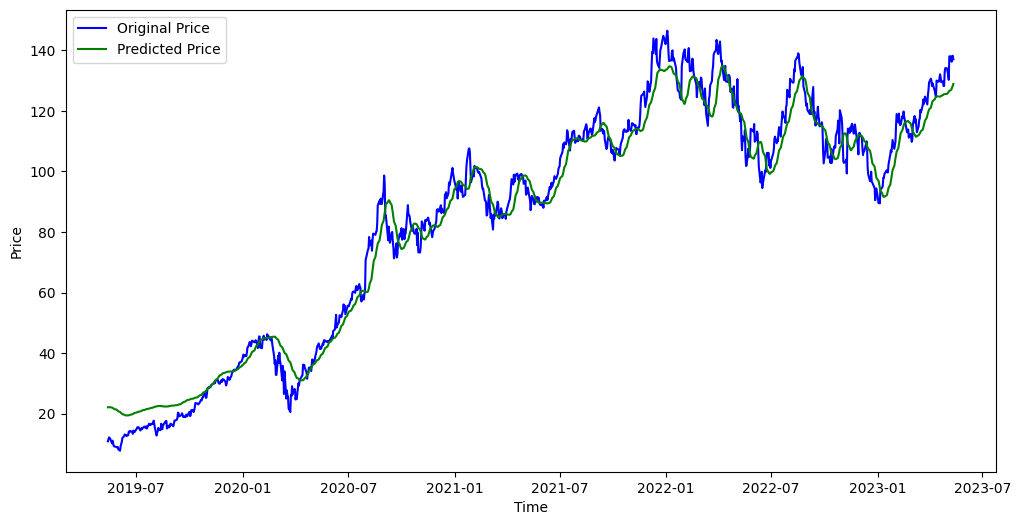

In [142]:
plt.figure(figsize=(12,6))
plt.plot(date,y_test,'blue',label='Original Price')
plt.plot(date,y_predicted,'green',label='Predicted Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

#### THANK YOU !!

##### Project by Mr. Arghadip Biswas

In [145]:
new_date = df.iloc[ int(len(df)*0.70):int(len(df)),0]
print(new_date)

2354   2019-05-13
2355   2019-05-14
2356   2019-05-15
2357   2019-05-16
2358   2019-05-17
          ...    
3358   2023-05-08
3359   2023-05-09
3360   2023-05-10
3361   2023-05-11
3362   2023-05-12
Name: Date, Length: 1009, dtype: datetime64[ns]
